In [29]:
import os

import sys
sys.path.append("/kaggle/input/pip-openslide")
import openslide
import numpy as np 

dirs = [
    '/kaggle/input/reghf1',
    '/kaggle/input/reghf2',
    '/kaggle/input/reghf3',
    '/kaggle/input/reghf4',
    '/kaggle/input/reghf5',
    '/kaggle/input/reghf6',
    '/kaggle/input/reghf7',
    '/kaggle/input/reghf8',
    '/kaggle/input/reghf9',
    '/kaggle/input/reghf10',
    '/kaggle/input/reghf11',

]



first_arr = []
second_arr = []

import tqdm
c = 0
for d in tqdm.tqdm(dirs):
    files = os.listdir(d)
    for f in files:
        c+=1
        try:
            file_p = os.path.join(d , f)
            slide = openslide.OpenSlide(file_p)
            first , second = slide.level_dimensions[0]
            first_arr.append(first)
            second_arr.append(second)
        except Exception as e:
            print(e)
c

 27%|██▋       | 3/11 [00:34<01:41, 12.64s/it]

Unsupported or missing image file


 45%|████▌     | 5/11 [01:09<01:34, 15.69s/it]

Unsupported or missing image file
Unsupported or missing image file


 64%|██████▎   | 7/11 [01:42<01:04, 16.12s/it]

Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file


JPEGFixupTagsSubsamplingSec: Warning, Auto-corrected former TIFF subsampling values [2,2] to match subsampling values inside JPEG compressed data [1,1].


Unsupported or missing image file
Unsupported or missing image file


 73%|███████▎  | 8/11 [01:54<00:44, 14.75s/it]

Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or

 82%|████████▏ | 9/11 [02:03<00:26, 13.03s/it]

Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file


 91%|█████████ | 10/11 [02:12<00:11, 11.89s/it]JPEGFixupTagsSubsamplingSec: Warning, Auto-corrected former TIFF subsampling values [2,2] to match subsampling values inside JPEG compressed data [1,1].


Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file
Unsupported or missing image file


100%|██████████| 11/11 [02:17<00:00, 12.46s/it]

Unsupported or missing image file


5210

In [6]:
np.save("first.npy", first_arr)
np.save("second.npy", second_arr)

In [8]:
np.shape(first_arr)

(5115,)

In [9]:
np.shape(second_arr)

(5115,)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# Convert list to numpy array
second_arr = np.array(second_arr)

# X-axis as file number
x = np.arange(len(second_arr))

# Apply Savitzky-Golay filter
window_length = 101 if len(second_arr) > 101 else len(second_arr) // 2 * 2 + 1
smoothed = savgol_filter(second_arr, window_length=window_length, polyorder=3)

# Plot with aesthetic colors
plt.figure(figsize=(12, 6))
plt.plot(x, second_arr, color='#7FB3D5', alpha=0.4, label='Original', linewidth=1.2)
plt.plot(x, smoothed, color='#F1948A', label='Smoothed Trend', linewidth=2)

# Titles and styling
plt.title("Dimension Trend Across Files", fontsize=16, color='#2C3E50')
plt.xlabel("File Number", fontsize=12)
plt.ylabel("Dimension Value", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='#D5DBDB')
plt.legend()
plt.tight_layout()
plt.show()


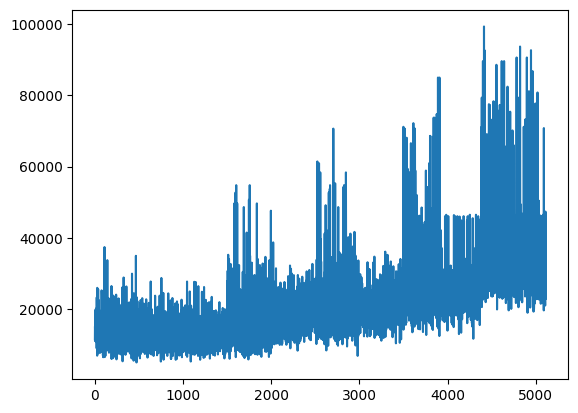

In [10]:
import matplotlib.pyplot as plt 
plt.plot(second_arr)

In [17]:
p = "/kaggle/input/reghf1/PIT_01_00119_01.tiff"
slide = openslide.OpenSlide(p)
image = slide.read_region((0, 0), 0, slide.level_dimensions[0]).convert("RGB")

full = np.array(image)

In [27]:
slide.level_dimensions[0]

(21932, 7686)

In [22]:
from PIL import Image
small_img = image.resize((256, 256), resample=Image.LANCZOS)

In [23]:
small_np = np.transpose(np.array(small_img).astype(np.float32) / 255.0, (2, 0, 1))

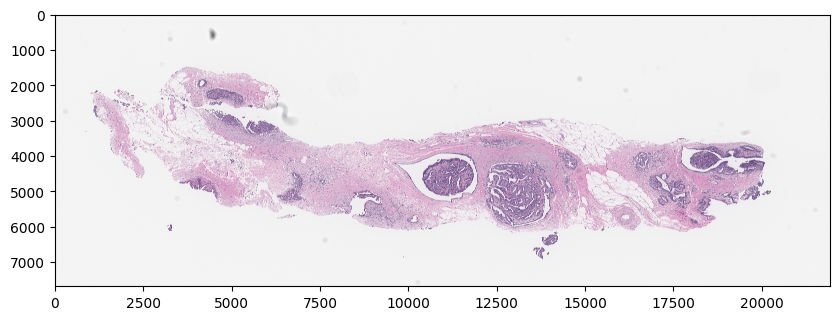

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(image)

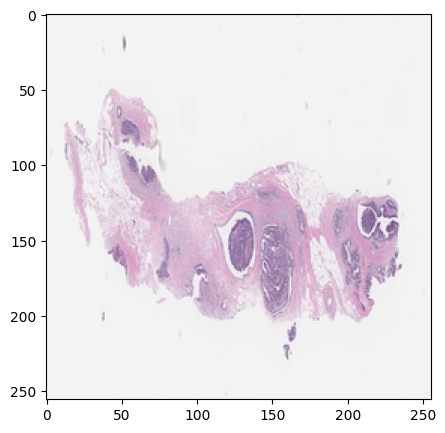

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(small_img)

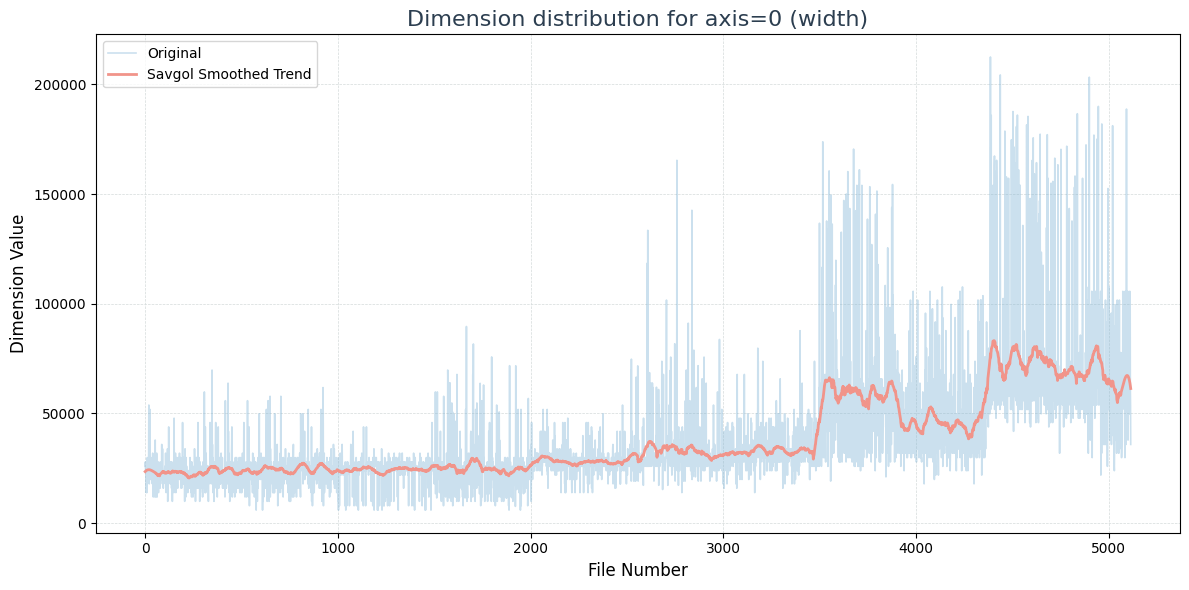

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

first_arr = np.array(first_arr)

x = np.arange(len(first_arr))

window_length = 101 if len(first_arr) > 101 else len(first_arr) // 2 * 2 + 1
smoothed = savgol_filter(first_arr, window_length=window_length, polyorder=3)

plt.figure(figsize=(12, 6))
plt.plot(x, first_arr, color='#7FB3D5', alpha=0.4, label='Original', linewidth=1.2)
plt.plot(x, smoothed, color='#F1948A', label='Savgol Smoothed Trend', linewidth=2)

plt.title("Dimension distribution for axis=0 (width)", fontsize=16, color='#2C3E50')
plt.xlabel("File Number", fontsize=12)
plt.ylabel("Dimension Value", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='#D5DBDB')
plt.legend()
plt.tight_layout()
plt.show()


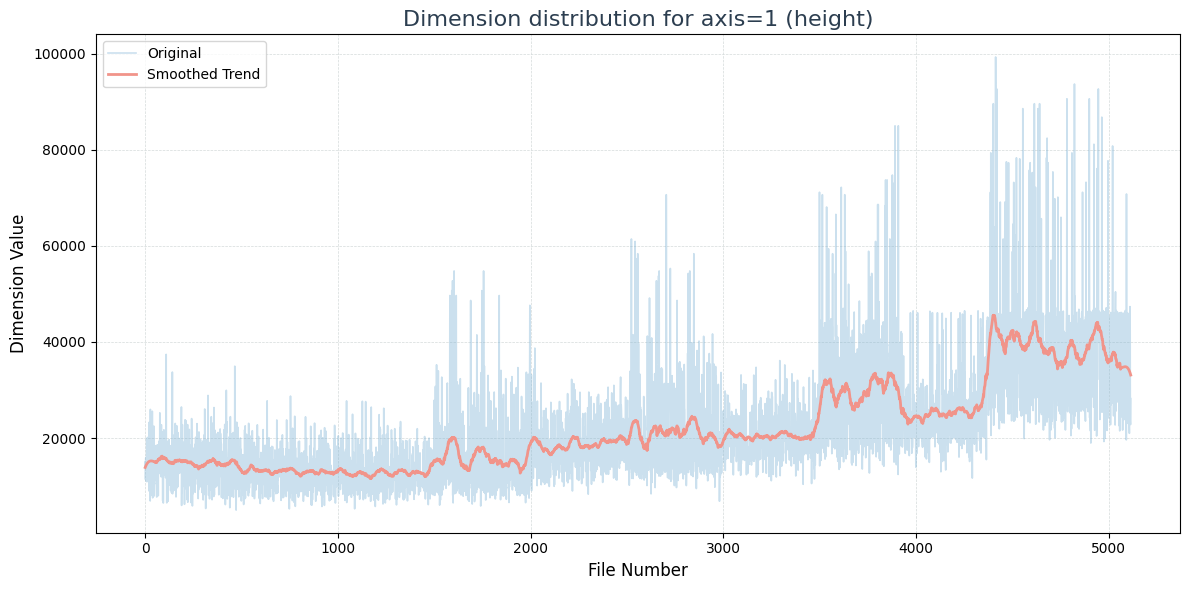

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

second_arr = np.array(second_arr)

x = np.arange(len(second_arr))

window_length = 101 if len(second_arr) > 101 else len(second_arr) // 2 * 2 + 1
smoothed = savgol_filter(second_arr, window_length=window_length, polyorder=3)

plt.figure(figsize=(12, 6))
plt.plot(x, second_arr, color='#7FB3D5', alpha=0.4, label='Original', linewidth=1.2)
plt.plot(x, smoothed, color='#F1948A', label='Savgol Smoothed Trend', linewidth=2)

plt.title("Dimension distribution for axis=1 (height)", fontsize=16, color='#2C3E50')
plt.xlabel("File Number", fontsize=12)
plt.ylabel("Dimension Value", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='#D5DBDB')
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
np.mean(first_arr) , np.mean(second_arr)

(37880.25865102639, 21805.987878787877)

In [30]:
c

5210

In [31]:
np.shape(first_arr) , np.shape(second_arr)

((5115,), (5115,))

In [34]:
!pip install levenshtein -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.8 MB/s eta 0:00:0000:01


In [36]:
from Levenshtein import ratio
s1 = "The boy went home"
s2 = "The child returned to his house"

lev_ratio = ratio(s1, s1)
print(f"Levenshtein Ratio: {lev_ratio:.2f}")

Levenshtein Ratio: 1.00


In [38]:
pip install nltk rouge-score python-Levenshtein sentence-transformers -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.

In [40]:
from typing import List, Tuple
from statistics import mean
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from Levenshtein import ratio as levenshtein_ratio
from sentence_transformers import SentenceTransformer, util

# Load sentence-transformers model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

def evaluate_metrics(references: List[str], predictions: List[str]) -> dict:
    assert len(references) == len(predictions), "Lists must be of equal length."

    rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    smoothie = SmoothingFunction().method4

    bleu_scores, rougeL_scores, levenshtein_scores, cosine_scores = [], [], [], []

    for ref, pred in zip(references, predictions):
        # BLEU
        bleu = sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie)
        bleu_scores.append(bleu)

        # ROUGE-L
        rouge_scores = rouge.score(ref, pred)
        rougeL = rouge_scores['rougeL'].fmeasure
        rougeL_scores.append(rougeL)

        # Levenshtein Ratio
        lev = levenshtein_ratio(ref, pred)
        levenshtein_scores.append(lev)

        # Cosine Similarity
        embeddings = sbert_model.encode([ref, pred], convert_to_tensor=True)
        cosine = util.cos_sim(embeddings[0], embeddings[1]).item()
        cosine_scores.append(cosine)

    def summarize(scores: List[float]) -> Tuple[float, float, float]:
        return round(mean(scores), 4), round(max(scores), 4), round(min(scores), 4)

    return {
        "BLEU": summarize(bleu_scores),
        "ROUGE-L": summarize(rougeL_scores),
        "Levenshtein Ratio": summarize(levenshtein_scores),
        "Cosine Similarity": summarize(cosine_scores)
    }

# Sample input for testing
sample_references = [
    "The quick brown fox jumps over the lazy dog",
    "Machine learning is fascinating",
    "He went to the market"
]

sample_predictions = [
    "A quick brown fox jumped over a lazy dog",
    "ML is really interesting",
    "He went shopping at the market"
]

# Run the evaluation
results = evaluate_metrics(sample_references, sample_references)
results

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'BLEU': (1.0, 1.0, 1.0),
 'ROUGE-L': (1.0, 1.0, 1.0),
 'Levenshtein Ratio': (1.0, 1.0, 1.0),
 'Cosine Similarity': (1.0, 1.0, 1.0)}